In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
train_dir = os.path.join('data/train/')
validation_dir = os.path.join('data/test/')

In [4]:
train_healthy_dir = os.path.join(train_dir, 'healthy')  # directory with our training healthy pictures
train_unhealthy_dir = os.path.join(train_dir, 'unhealthy')  # directory with our training infected pictures
validation_healthy_dir = os.path.join(validation_dir, 'healthy')  # directory with our validation healthy pictures
validation_unhealthy_dir = os.path.join(validation_dir, 'unhealthy')  # directory with our validation infected pictures

In [5]:
num_healthy_tr = len(os.listdir(train_healthy_dir))
num_unhealthy_tr = len(os.listdir(train_unhealthy_dir))

num_healthy_val = len(os.listdir(validation_healthy_dir))
num_unhealthy_val = len(os.listdir(validation_unhealthy_dir))

total_train = num_healthy_tr + num_unhealthy_tr
total_val = num_healthy_val + num_unhealthy_val

In [6]:
print('total training healthy images:', num_healthy_tr)
print('total training unhealthy images:', num_unhealthy_tr)

print('total validation healthy images:', num_healthy_val)
print('total validation unhealthy images:', num_unhealthy_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training healthy images: 88
total training unhealthy images: 88
total validation healthy images: 40
total validation unhealthy images: 40
--
Total training images: 176
Total validation images: 80


In [7]:
batch_size = 12
epochs = 40
IMG_HEIGHT = 64
IMG_WIDTH = 64
IMAGE_SIZE=(IMG_WIDTH, IMG_HEIGHT)
IMAGE_CHANNELS=3

In [8]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [9]:
train_data_gen = train_image_generator.flow_from_directory('data/train/',batch_size=batch_size,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 176 images belonging to 2 classes.


In [10]:
val_data_gen = validation_image_generator.flow_from_directory('data/test/',batch_size=batch_size,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 80 images belonging to 2 classes.


In [11]:
sample_training_images, _ = next(train_data_gen)

In [12]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

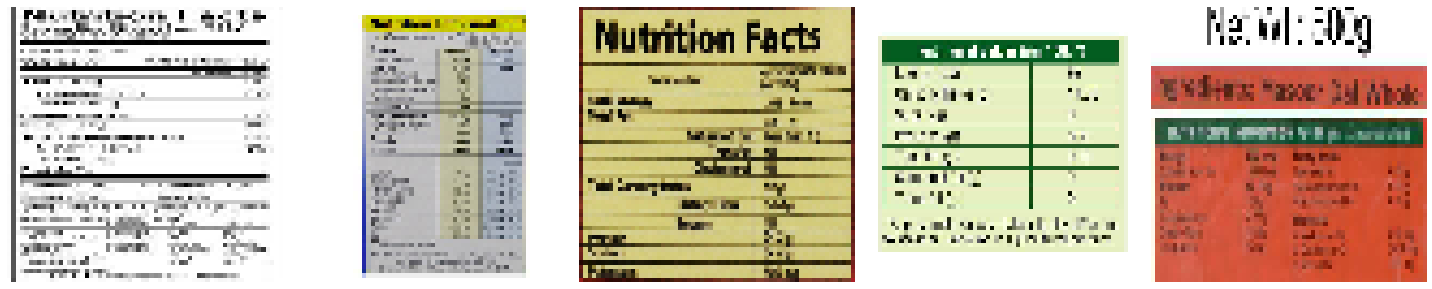

In [13]:
plotImages(sample_training_images[:5])

In [15]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a third convolutional layer
classifier.add(Conv2D(128, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a fourth convolutional layer
classifier.add(Conv2D(128, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())
# Step 4 - Full connection
classifier.add(Dense(units = 64, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [19]:
history = classifier.fit_generator(train_data_gen,
                         steps_per_epoch = 500,
                         epochs = 15,
                         validation_data = val_data_gen,
                         validation_steps = 200)
                         #callbacks = [checkpoint])
print(history.history.keys())

Epoch 1/15
500/500 [==============================] - 184s 368ms/step - loss: 0.2769 - accuracy: 0.8335 - val_loss: 2.4139 - val_accuracy: 0.7006
Epoch 2/15
500/500 [==============================] - 180s 361ms/step - loss: 1.9907e-04 - accuracy: 1.0000 - val_loss: 2.5919 - val_accuracy: 0.6997
Epoch 3/15
500/500 [==============================] - 186s 373ms/step - loss: 5.6332e-05 - accuracy: 1.0000 - val_loss: 2.6566 - val_accuracy: 0.7002
Epoch 4/15
500/500 [==============================] - 180s 360ms/step - loss: 2.4188e-05 - accuracy: 1.0000 - val_loss: 2.7196 - val_accuracy: 0.6997
Epoch 5/15
500/500 [==============================] - 183s 366ms/step - loss: 1.2108e-05 - accuracy: 1.0000 - val_loss: 2.7834 - val_accuracy: 0.7002
Epoch 6/15
500/500 [==============================] - 126s 252ms/step - loss: 6.7491e-06 - accuracy: 1.0000 - val_loss: 2.8487 - val_accuracy: 0.7137
Epoch 7/15
500/500 [==============================] - 117s 235ms/step - loss: 4.0793e-06 - accuracy: 1.0

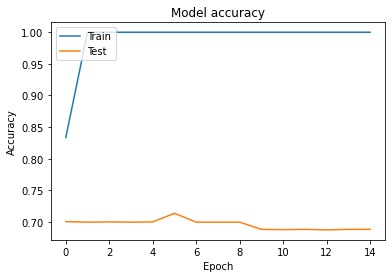

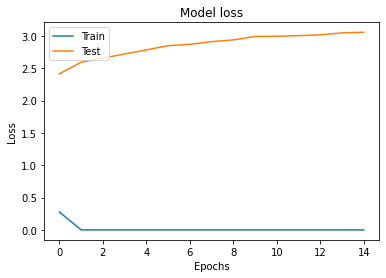

In [26]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [33]:
from keras.preprocessing import image
test_image = image.load_img('data/test/unhealthy/mathri.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
print(result)
print(train_data_gen.class_indices)
if result[0][0] == 1:
    prediction = 'healthy'
else:
    prediction = 'unhealthy'
print(prediction)

[[0.]]
{'healthy': 0, 'unhealthy': 1}
unhealthy
